# Exploring Oura ring data

In [1]:
#%pip install pandas mlplot

import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter


## First, let's grab data from local json file, using only sleep data

In [2]:
def grab_oura_json(file_path):    
    with open(file_path) as activities_file:
        data = json.load(activities_file)
        return data

file_path = 'data/oura_activities.json'
data = grab_oura_json(file_path)
# activity, notes, readiness, restful_periods, sleep    
df = pd.DataFrame.from_dict(data['sleep'])
#df.info()
#df.head()
#df.describe()
#df['bedtime_end']

## Now, let's build an index of bedtime_end date components

In [3]:
df['datetime'] = pd.to_datetime(df['bedtime_end'], utc=True).dt.normalize()
df['weekday'] = df['datetime'].dt.dayofweek
df['datetime_naive'] = df['datetime'].apply(lambda t: t.replace(tzinfo=None))
df = df.set_index('datetime_naive')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 2020-08-19 to 2022-01-07
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   awake                        471 non-null    int64              
 1   bedtime_end                  471 non-null    object             
 2   bedtime_end_delta            471 non-null    int64              
 3   bedtime_start                471 non-null    object             
 4   bedtime_start_delta          471 non-null    int64              
 5   breath_average               471 non-null    float64            
 6   deep                         471 non-null    int64              
 7   duration                     471 non-null    int64              
 8   efficiency                   471 non-null    int64              
 9   hr_5min                      471 non-null    object             
 10  hr_average                   47

# Time to plot some sleep metrics over timeline

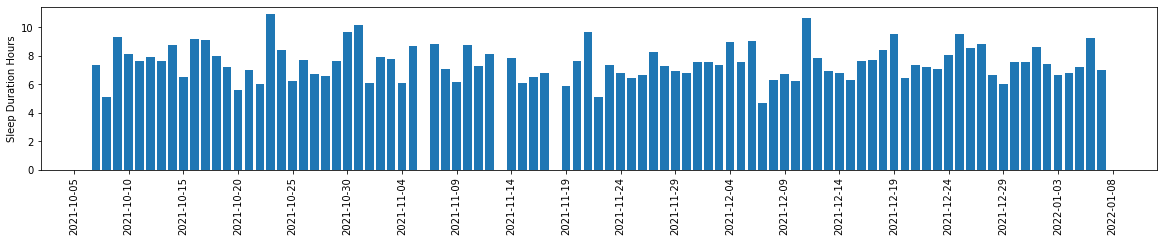

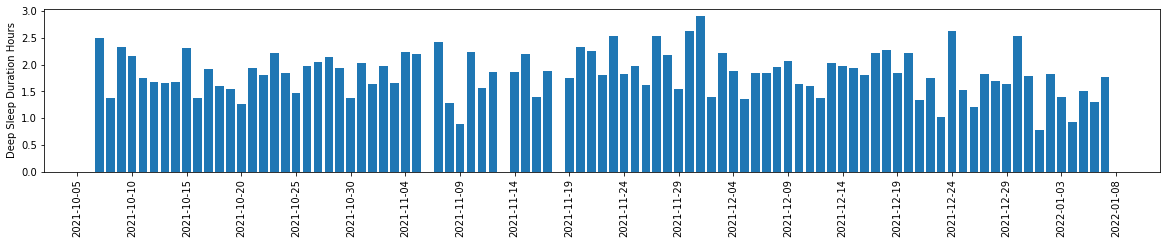

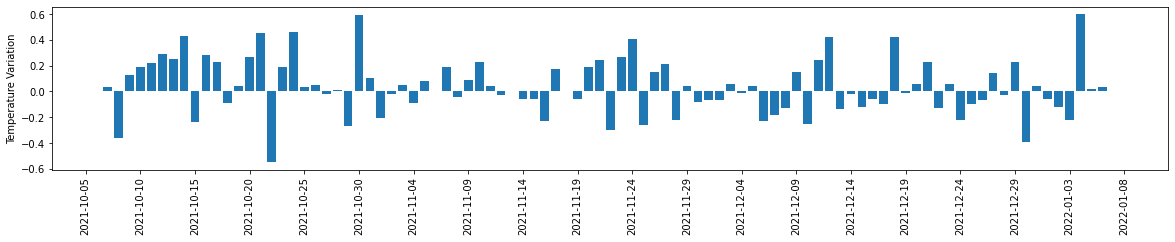

In [4]:
def plot_field(field_name, field_label):
    plt.rcParams["figure.figsize"] = (20,3)
    fig, ax = plt.subplots()
    plt.bar(df.index.values, field_name, data=df, axes=ax) 
    #plt.bar('datetime', field_name, data=df, axes=ax) 
    dfmt = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_ylabel(field_label)
    plt.xticks(rotation=90) 
    plt.show()


    
df = df.tail(90) # Grab 90 recent dates


# duration, awake, rem, light, deep
# hr_lowest, hr_average, hr_5min
# efficiency, onset_latency, midpoint_time, restless
# temperature_delta, breath_average
# score, score_total, score_rem, score_deep, score_efficiency, score_latency, score_disturbances, score_alignment
# rmssd, rmssd_5min
df['duration_hours']=df['duration']/3600 # Convert seconds to hours
plot_field('duration_hours','Sleep Duration Hours')

df['deep_hours']=df['deep']/3600 # Convert seconds to hours
plot_field('deep_hours','Deep Sleep Duration Hours')


plot_field('temperature_delta','Temperature Variation')


In [8]:
#df.loc[pd.to_datetime('2021-11-05')]
#df.loc[pd.to_datetime('2021-11-06')]
df.loc[pd.to_datetime('2021-10-23')] # Weekdays 0 to 6, Monday to Sunday

awake                                                                       4380
bedtime_end                                            2021-10-23T09:09:32+03:00
bedtime_end_delta                                                          32972
bedtime_start                                          2021-10-22T22:16:32+03:00
bedtime_start_delta                                                        -6208
breath_average                                                            13.625
deep                                                                        7980
duration                                                                   39180
efficiency                                                                    89
hr_5min                        [0, 62, 64, 67, 65, 63, 59, 59, 63, 66, 62, 60...
hr_average                                                                  62.2
hr_lowest                                                                   54.0
hypnogram_5min              